In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("dark_background")
df = pd.read_csv("./time_evolution_10_levels.csv")

df.shape = (7642, 43)
df['volume_bar_label'].shape = (7642,)
df['volume_bar_label'].nunique() = 7642


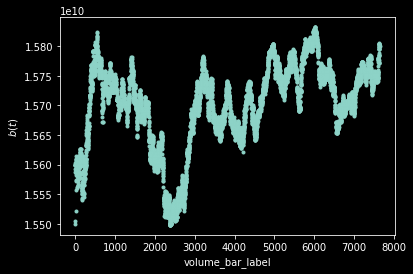

bid_volatility.std() = 0.0 (realized volatility per trade)


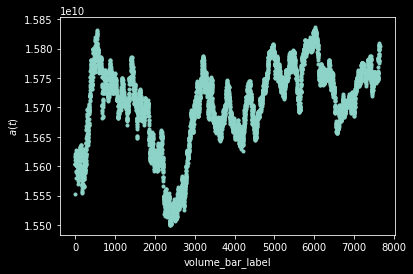

ask_volatility.std() = 0.0 (realized volatility per trade)


In [7]:
df = df.drop(df[df.bid_price_0 <= 0].index)
df = df.drop(df[df.ask_price_0 <= 0].index)
print(f"{df.shape = }")
print(f"{df['volume_bar_label'].shape = }")
print(f"{df['volume_bar_label'].nunique() = }")
bid_price_series = df.groupby("volume_bar_label")['bid_price_0'].min()
ask_price_series = df.groupby("volume_bar_label")['ask_price_0'].max()
plt.scatter([t for t in range(len(bid_price_series))], bid_price_series, marker=".")
plt.xlabel("volume_bar_label")
plt.ylabel("$b(t)$")
plt.show()
bid_volatility = np.log(bid_price_series[1:]) - np.log(bid_price_series[:-1])
print(f"{bid_volatility.std() = }", "(realized volatility per trade)")
plt.scatter([t for t in range(len(ask_price_series))], ask_price_series, marker=".")
plt.xlabel("volume_bar_label")
plt.ylabel("$a(t)$")
plt.show()
ask_volatility = np.log(ask_price_series[1:]) - np.log(ask_price_series[:-1])
print(f"{ask_volatility.std() = }", "(realized volatility per trade)")